In [1]:
import numpy as np
import csv, os
import matplotlib.pyplot as plt

In [2]:
# train = "./src/results/log_train_16_23-02-2024_10-15-39.csv"
# valid = "./rc/results/log_valid_16_23-02-2024_10-15-39"
dataset = "iam"
loss_name = "siamese"
vgg_layer = 9
max_word_len = 10
folder_name = f"{dataset}/{loss_name}-{max_word_len}char-adam-lr001"
train = "./src/saved_losses/saved_losses/" + folder_name + '/log_train_8_11-04-2024_19-57-13.csv'
eval = "./src/saved_losses/saved_losses/" + folder_name + '/log_valid_8_11-04-2024_19-57-13.csv'
print(os.getcwd())

c:\Users\Lisa\Documents\GitHub\handwriting-recognition


In [3]:
def read_eval_losses(eval_path):
    epochs = []
    losses = []
    cers = []
    wers = []
    with open(eval_path) as eval_f:
        reader = csv.reader(eval_f, delimiter=',')
        idx = 0
        for line in reader:
            print(line)
            idx += 1
            epoch, loss, cer, wer = line[0].split(" ")
            epochs.append(epoch)
            losses.append(loss)
            cers.append(cer)
            wers.append(wer)

    return np.array(epochs, dtype=np.int16), np.array(losses, dtype=np.float32), np.array(cers, dtype=np.float32), np.array(wers, dtype=np.float32)

epochs, train_losses, train_cers, train_wers = read_eval_losses(train)
epochs, valid_losses, valid_cers, valid_wers = read_eval_losses(eval)
    



['0 0.6176509 0.93762974 1.']
['1 0.56195796 0.95131415 1.']
['2 0.5613677 0.94991897 1.']
['3 0.57459575 0.96853869 1.']
['4 0.57277775 0.98698966 1.']
['5 0.56925374 0.98834324 1.']
['6 0.5644127 0.9601706 1.']
['7 0.55362916 0.95394551 1.']
['8 0.55027395 0.95774467 1.']
['9 0.49974754 0.96013245 1.']
['10 0.46902922 0.96548196 1.']
['11 0.4675018 0.96698604 1.']
['12 0.4839047 0.96241031 1.']
['13 0.47474247 0.96216866 1.']
['14 0.45693666 0.95994514 1.']
['15 0.4468982 0.97988566 1.']
['16 0.43544438 0.97709571 1.']
['17 0.42248416 0.97234422 1.']
['18 0.41096726 0.96100365 1.']
['19 0.4085683 0.94953994 1.']
['20 0.3943386 0.94350149 1.']
['21 0.36997518 0.94288808 1.']
['22 0.3571322 0.94532555 1.']
['23 0.34274995 0.94168369 1.']
['24 0.33515552 0.94070495 1.']
['25 0.3292461 0.9415995 1.']
['26 0.32394406 0.94044526 1.']
['27 0.3204139 0.94080205 1.']
['28 0.31705016 0.94228453 1.']
['29 0.3087578 0.94126315 1.']
['30 0.30490932 0.94109131 1.']
['0 0.5710987 0.95823478 1.']
['

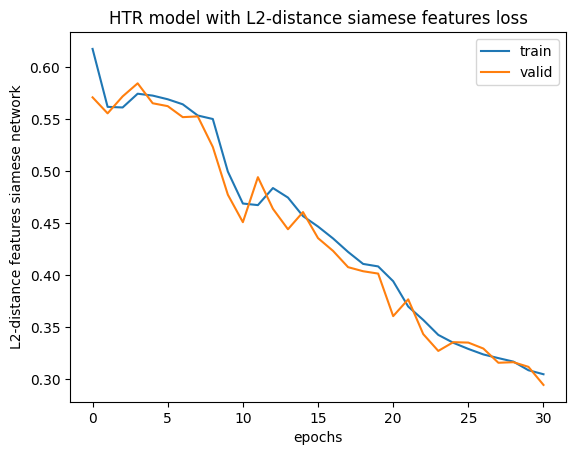

In [5]:
plt.plot(epochs, train_losses, label="train")
plt.plot(epochs, valid_losses, label="valid")
plt.xlabel("epochs")
plt.ylabel(loss_name)
plt.legend()
plt.savefig( "./src/saved_losses/saved_losses/" + folder_name +  "/losses.png", dpi=300, bbox_inches="tight")
plt.show()



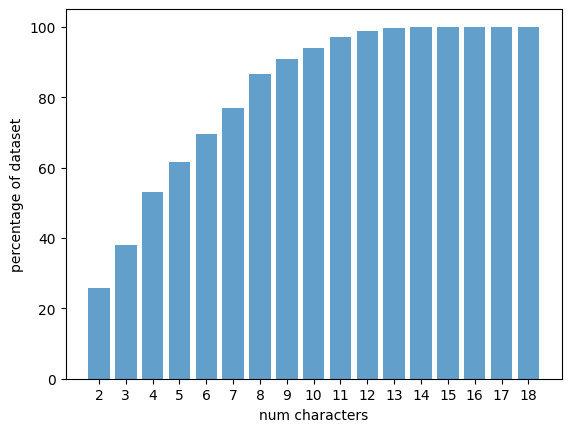

In [5]:

lengths = [i for i in range(2, 19)]
counts = [15981, 7523, 9388, 5227, 4817, 4681, 5911, 2648, 2000, 1936, 924, 539, 180, 64, 19, 4, 6]
sum_counts = sum(counts)
counts = [count/sum_counts * 100 for count in counts]
counts = [sum(counts[:idx + 1]) for idx in range(len(counts))]

plt.bar(lengths, counts, align='center', alpha=0.7)
plt.xlabel("num characters")
plt.ylabel("percentage of dataset")
plt.xticks(lengths)
plt.savefig('./word_len_counts.png', dpi=300, bbox_inches="tight")
plt.show()